# **Lab session 1**

This is the work of Eidan TZDAKA and Alexandre Amiot

## **Exercise 3 : Recognition of hand-written characters from the scikit-learn database using a CNN**

Start from the code you developed in exercise 2. Modify it to replace the perceptron by a two-stage CNN. The first stage will contain a unique filter layer and a maxpooling. The second stage will contain a flatten layer and one predicting dense layer.

In [2]:
"""Import necessary libraries"""
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the digits dataset from scikit-learn
# Import datasets and performance metrics
from sklearn import datasets
digits = datasets.load_digits()

The data we are interested in are 
8x8 images of digits. A CNN can process images directly without having them to be vectorized. Work directly with the **digits.images** from sklearn.datasets .


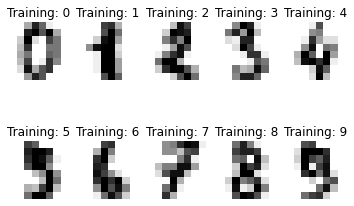

In [4]:
# The data we are interested in is made of 8x8 images of digits, let's
# have a look at the first 10 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

What is the size of the images? How many images do we have?

We have 1797 images of size 8x8

In [5]:
print (digits.images.shape)
print (digits.target[1:10])

(1797, 8, 8)
[1 2 3 4 5 6 7 8 9]


Again, convert the target into the matrix 'y' in one-hot format. This will allow the predictors output one at a time using the soft-max activation. What is the shape of the 'y' matrix. Use the keras function utils.to_categorical().

In [6]:
from tensorflow import keras
n_classes = len(np.unique(digits.target))
y = keras.utils.to_categorical(digits.target, n_classes)
print (y.shape)

(1797, 10)


When working with images, keras CNN implicitly assume colour images.

The colours come in separate channels. These channels appear as the last dimension of the array.

Our hand-written characters are grey-tone images, that is one-channel images. We need to add
this dimension to the array to make keras understand that we only have one channel.

Print the shape of your array X. You should have a 4-D array with the last dimension equal to 1.

In [7]:
X = np.expand_dims(digits.images,axis=-1)
print (X.shape)

(1797, 8, 8, 1)


## Prepare the train and test dataset.

1.   split dataset into test and train dataset.
2.   split further the train dataset into train and validation part
Use the **keras.model_selection** function **train_test_split()** to separate a dataset. You can choose the percentage of the split, or leave the defaut value.

In [8]:
digits.data.shape

(1797, 64)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [10]:
X_train.shape

(1010, 8, 8, 1)

## create a sequential model

1.   The model will the keras sequential model containing a usual two-stage CNN.
Instantiate the model using **model=Sequential()**. 
Add a first convolution layer **Conv2D()**. Specify the number of filters (start with 5), the filter size (say 3x3), the input shape, and the type of activation - choose 'relu'.
Add a **MaxPooling2D()** layer to reduce the size.
Add a layer to vectorize the data : **Flatten()**.
Finally add a **Dense()** layer from **keras.layers**. Specify the number of classes to output. What kind of activation will you use?

We will use the relu activation function so that it doesnt activate all the neurons at the same time, they are not activated if the output of the linear transformation is less than 0 and thanks to that it is more computational efficient.

2.   Compile the model. Specify the loss. Choose an optimizer and the evaluation metrics to use. Use the class function **compile()** of the sequential model you have created.



In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
# create the sequential model
model = Sequential()
model.add(Conv2D(5,kernel_size=3, input_shape=(8,8,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid", data_format=None))
model.add(Flatten())
model.add(Dense(n_classes, input_shape=(28,28,1),activation='softmax'))


# compile the model. Use the categorical crossentropy, the adam optimizer and accuracy
# as the evaluation metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## train the model

You can leave the same parameters as before.

In [22]:
# train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_val,y_val))

Epoch 1/100
8/8 [==============================] - 1s 32ms/step - loss: 12.5485 - accuracy: 0.1020 - val_loss: 11.1362 - val_accuracy: 0.1128
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 9.6634 - accuracy: 0.1146 - val_loss: 9.2436 - val_accuracy: 0.0950
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 7.9350 - accuracy: 0.0926 - val_loss: 7.7247 - val_accuracy: 0.0682
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 6.9333 - accuracy: 0.0806 - val_loss: 6.5110 - val_accuracy: 0.0682
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 5.9480 - accuracy: 0.0721 - val_loss: 5.5323 - val_accuracy: 0.0890
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 5.0212 - accuracy: 0.0818 - val_loss: 4.7244 - val_accuracy: 0.1157
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 4.3627 - accuracy: 0.0980 - val_loss: 4.1001 - val_accuracy: 0.1246
Epoch 8/100
8/8 [=======

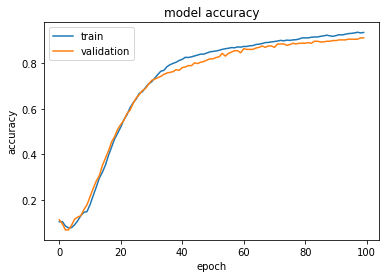

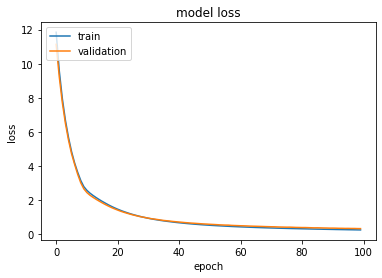

In [23]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Analyze the results.

1.   Print a summary of the model - use the model's class function **summary()**. How many parameters does the model have? Is this model bigger or smaller than the previous one?
2.   What was the accuracy you obtained at the end of the training? Do you use the training or validation accuracy to answer?
3. If you run the model several times, do you always obtain the same accuracy?

1, If we have only 5 filters, the model only have 510 parameters which is arround the same size as the previous one (610), this is a small model, if we increase the number of filters, like 64, we now have 6410 parameters, this model is bigger than the ones that we previously used. But in a general manner, it is still a small model.

2, At the end of the training we have an accuracy of 0.9324 on the training data and an accuracy of 0.9110 which represents the accuracy of the model. The results are not as good as the previous model. If can increase the accuracy a lot by adding filters, with 64 filters, we have a training accuracy of 1 and a validation accuracy of 0.9885.

3, No, every time we run it, the accuracies changes, for example, if we rerun it we can have an accuracy of 0.9145 instead of 0.9110.

## Print the model summary.

In [24]:
# print the model summary
print (model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 6, 6, 5)           50        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 5)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 45)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                460       
Total params: 510
Trainable params: 510
Non-trainable params: 0
_________________________________________________________________
None


## print the confusion matrix obtained on the test dataset.

Use the **confusion_matrix()** function provided in **sklearn.metrics**.

In [25]:
Y_test_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

CM = confusion_matrix (np.argmax(y_test,axis=1), np.argmax(Y_test_pred,axis=1))

print (CM)

[[54  0  0  0  0  0  0  0  1  0]
 [ 0 50  1  0  3  1  0  0  1  2]
 [ 0  1 37  0  0  0  0  1  1  0]
 [ 0  0  1 34  0  0  0  1  1  2]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 1  0  0  1  0 47  0  0  0  0]
 [ 1  1  0  0  0  1 39  0  2  0]
 [ 0  0  0  0  0  3  0 36  0  1]
 [ 0  3  0  0  0  0  0  4 30  0]
 [ 0  0  0  3  1  0  0  0  0 38]]


Normalize the confusion matrix to show graphically the prediction probability map.

Hint: The confusion matrix needs to be normalized by the counts of each class. Print the counts of elements in each class in the test dataset. Use the numpy function **unique()** to count the elements in y_test.

[55 58 40 39 46 49 44 40 37 42]


Text(0.5, 0, 'predicted label')

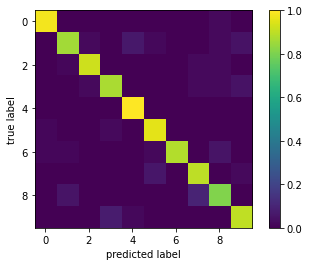

In [26]:
_,count = np.unique(np.argmax(y_test,axis=1),return_counts=True)
print (count)
CM = CM/count
CM = np.round(1000*CM)/1000

plt.figure('confusion matrix')
ax = plt.imshow(CM); plt.colorbar()
plt.ylabel('true label')
plt.xlabel('predicted label')

Evaluate the model on the test dataset. What is the accuracy on the test dataset? Use the model's class function **evaluate()**.

For 5 filters:
The loss and accuracy on the test dataset : 0.290320, 0.913333

For 64 filters:
The loss and accuracy on the test dataset : 0.049495, 0.984444


In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)


print ("The loss and accuracy on the test dataset : %f, %f"%(test_loss, test_accuracy))

15/15 [==============================] - 0s 2ms/step - loss: 0.2903 - accuracy: 0.9133
The loss and accuracy on the test dataset : 0.290320, 0.913333


## **Conclusions:**
Conclude your report by answering the following questions:

1. Did your training converge? 
2. Was the training successful? 
3. Try to improve the model. Try adding the number of filters in the filter layer. Does the accuracy improve?
4. Could you obtain better results than with the perceptron?

1, Yes the training converged toward a good accuracy, by plotting the model loss, we can also say that we have a very small overfitting but we discard it because it doesn't impact the model (too small).

2, We can say that the training was successful, the test score are good, we have an accuracy of 0.9133 and a model loss of 0.2903.

3, A good way to improve our model is by adding filters, here, we tried with 64 filters, which greatly improved our results. Now we have a 0.984444 accuracy for the test set with a model loss of only 0.049495.

4, Yes, the results can be way better than with the perceptron, but only if we set a good number of filters. 

In [ ]:
from google.colab import drive
base_working_dir = '/content/drive/My Drive/Colab Notebooks/MBE DL course'
drive.mount('/content/drive')

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

!jupyter nbconvert --to pdf  "drive/My Drive/Colab Notebooks/MBE DL course/exercise_3_assignment.ipynb" #>/dev/null 2>/dev/null